# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html).

The dataset being used is *Tips* from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings

In [13]:
#Note_yuri fix_warnings se inicializa el generador de números aleatorios de NumPy, 
#se activa la ocultación de los avisos y se fija el estilo gráfico de seaborn

np.random.seed(18)
warnings.filterwarnings('ignore')
sns.set()

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the `Unnamed: 0` column

In [3]:
del tips['Unnamed: 0']
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 5. Create a histogram with the `total_bill` column.

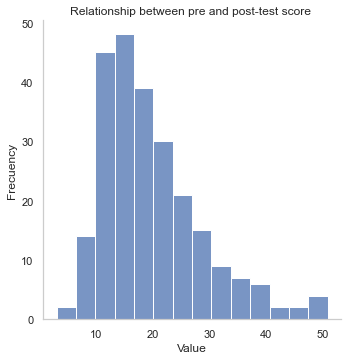

In [74]:
# Set theme: White background
#sns.set_style('whitegrid')   # The default theme is called 'darkgrid' 
sns.set_style("whitegrid", {'axes.grid' : False})  # and remove the grid

# Distribution Plot (a.k.a. Histogram)
sns.displot(tips.total_bill, kde=False)   # alpha=.3   # kde=True: displays the Normal
plt.title("Relationship between pre and post-test score")
plt.xlabel("Value")
plt.ylabel("Frecuency")

# take out the right and upper borders 
sns.despine()


In [76]:
print(sns.__version__)

0.11.2


### Step 6. Create a scatter plot representing the relationship between `total_bill` and `tip`, while also showing the distribution of each variable as a histogram.
Hint: It's just a single function call.

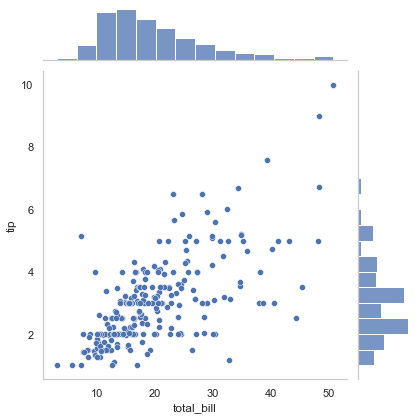

In [36]:
# Joint Distribution Plot
sns.jointplot(tips.total_bill, tips.tip, data=tips)

### Step 7.  Display the relationship between all the numerical variables using a single plot.
Hint: It's just a single function call.

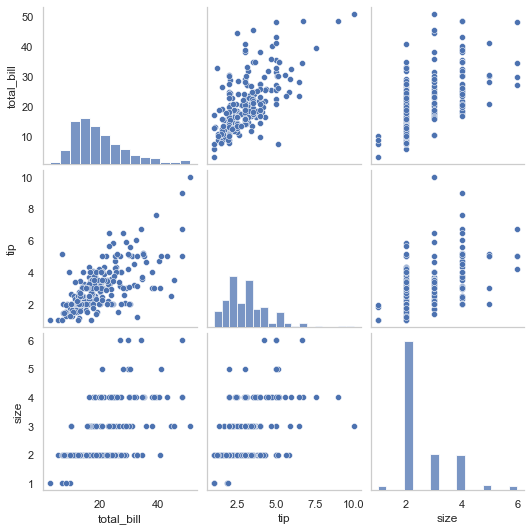

In [51]:
sns.pairplot(tips)

### Step 8. Create a scatter plot with the categorical variable `day` and it's relation to `total_bill`.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

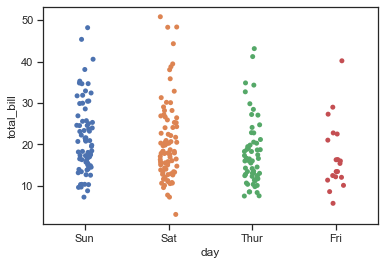

In [65]:
# Strip plot: Draw a scatterplot where one variable is CATEGORICAL :)
# day is a categorical variable
#plt.figure(figsize=(12,6))
sns.stripplot(x='day', y='total_bill', data=tips)  # size=3,  linewidth=1

<AxesSubplot:xlabel='day', ylabel='total_bill'>

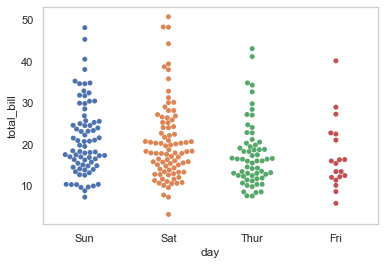

In [37]:
# Swarm plot   # It is not the answer, but I can see the difference between Sripplot and Swarmplot
#plt.figure(figsize=(12,6))
sns.swarmplot(x='day', y='total_bill', data=tips)  # size=3,  linewidth=1

### Step 9. Create a scatter plot with the categorical variable `day` and it's relation to `tip`. Put the `day` on the y-axis. Differentiate the dots by sex.

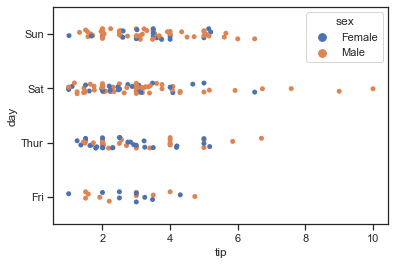

In [64]:
#seaborn.stripplot: Draw a scatterplot where one variable is CATEGORICAL :)

# A strip plot can be drawn on its own, but it is also a good complement 
# to a box or violin plot in cases where you want to show all observations
#  along with some representation of the underlying distribution.

ax = sns.stripplot(x='tip', y='day', hue="sex", data=tips)

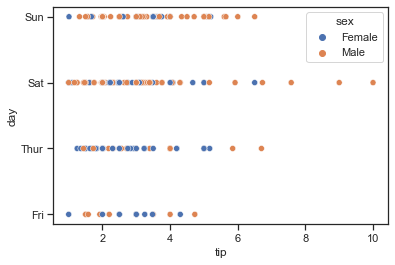

In [66]:
#plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='tip', y='day', hue="sex", data=tips)

### Step 10.  Create a box plot representing the `total_bill` per `day`, while also differentiating by `time` (Dinner or Lunch).

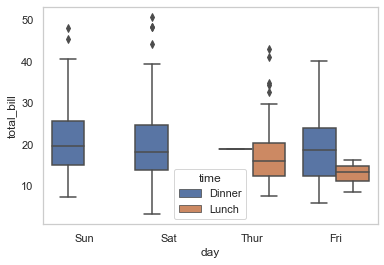

In [40]:
# Boxplot
ax = sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

### Step 11. Create two histograms of `tip`, based on whether it is dinner time or lunch time. They must be side by side.

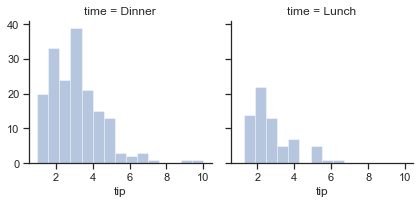

In [56]:
#seaborn style
sns.set(style='ticks')

a = sns.FacetGrid(data=tips, col='time')
a.map(sns.distplot, 'tip', kde=False)   # kde=True: displays the Normal

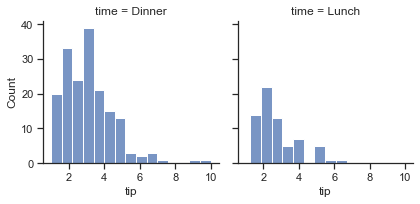

In [55]:
#seaborn style
sns.set(style='ticks')

a = sns.FacetGrid(data=tips, col='time')
a.map(sns.histplot, 'tip')    # histplot

### Step 12. Create two scatter plots, one for male and another for female, representing the `total_bill` and `tip` relationship, differentiating by smoker or no smoker.
### They must be side by side.

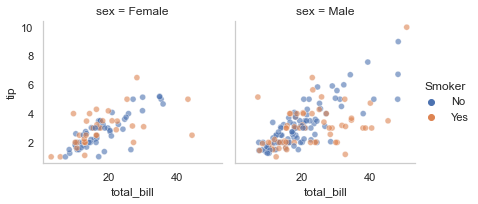

In [95]:
g = sns.FacetGrid(data=tips, col='sex')
g.map_dataframe(sns.scatterplot, x='total_bill', y='tip', hue='smoker', alpha=.6)

g.add_legend(title='Smoker')
plt.show(g)

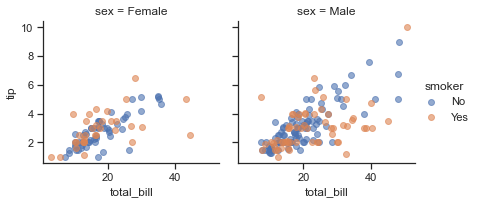

In [62]:
g = sns.FacetGrid(data=tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=.6)   # difference, using plt; instead sns.scatterplot

g.add_legend()

### BONUS: Create your own question and answer it using a graph.

Conditioning on other variables. Make an histogram conditioning the sex on the 'total_bill' variable

Text(0.5, 1.0, 'Total bill per sex')

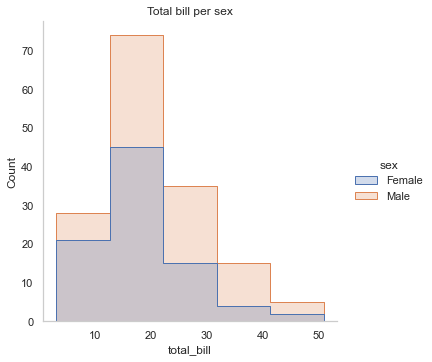

In [94]:
sns.displot(x ='total_bill', hue='sex', bins = 5, data=tips, element="step")
plt.title("Total bill per sex")